In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
#plt.gray()

<Figure size 640x480 with 0 Axes>

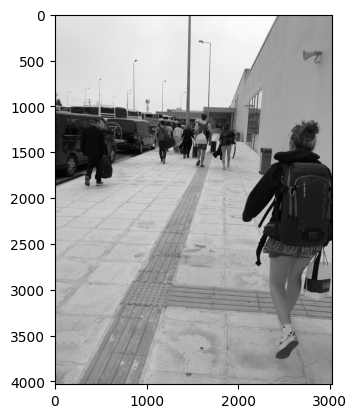

In [58]:
image_path = 'C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Kos.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [75]:

def adjust_canny_thresholds(image, target_ratio):
    # Startwerte für die Schwellenwerte
    low_threshold = 0
    high_threshold = 255

    # Maximale Anzahl an Kanten
    edge_pixels_max = np.count_nonzero(cv2.Canny(image, 255, 0))

    # Maximale Anzahl der Iterationen
    max_iterations = 60          #frei festgelegt!

    for i in range(max_iterations):
        # Kanten mit aktuellen Schwellenwerten erkennen
        edges = cv2.Canny(image, low_threshold, high_threshold)

        # Anzahl der erkannten Kanten berechnen
        edge_pixels = np.count_nonzero(edges)

        # Verhältnis von erkannten Kanten zur Gesamtanzahl der möglichen Kanten berechnen
        edge_ratio = edge_pixels / edge_pixels_max

        # Überprüfen, ob das gewünschte Verhältnis erreicht ist
        if edge_ratio >= target_ratio:
            break

        # Schwellenwerte anpassen
        low_threshold += 5
        high_threshold -= 5

        # Schwellenwerte begrenzen
        low_threshold = max(0, min(255, low_threshold))
        high_threshold = max(0, min(255, high_threshold))

    return low_threshold, high_threshold


#Ausführung der Funktion

low_threshold, high_threshold = adjust_canny_thresholds(img, 0.4)
print(f"Low Threshold: {low_threshold}")
print(f"High Threshold: {high_threshold}")

Low Threshold: 0
High Threshold: 255


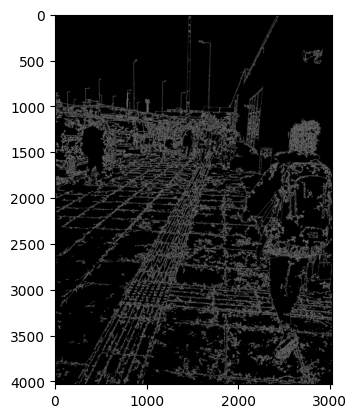

In [72]:
canny = cv2.Canny(img, 0, 100)
plt.imshow(canny)

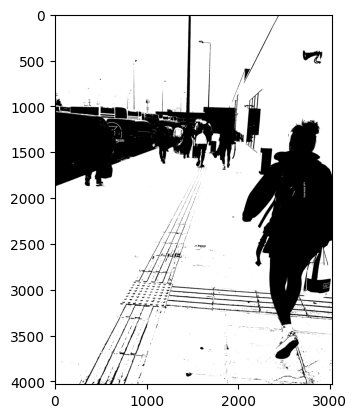

In [17]:
t, seg = cv2.threshold(img,125,1,cv2.THRESH_BINARY)
plt.imshow(seg)

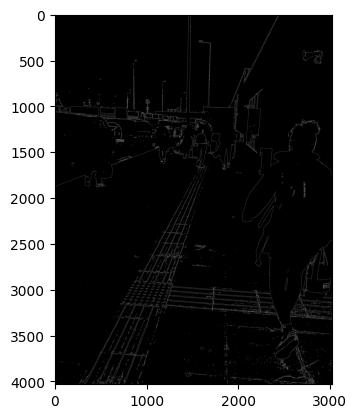

In [29]:
canny_seg = cv2.Canny(seg, 1, 1)
plt.imshow(canny_seg)

(4032, 3024)

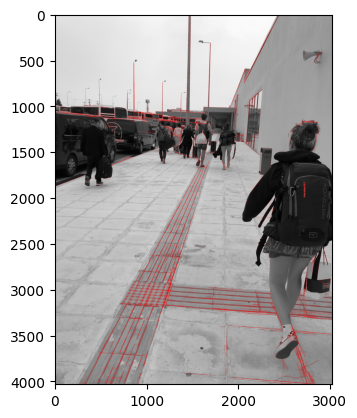

In [35]:
linesh = cv2.HoughLinesP(canny_seg, 1, np.pi/180, 80, minLineLength=50, maxLineGap=50)

lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
img_2 = img.copy()
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)
img.shape

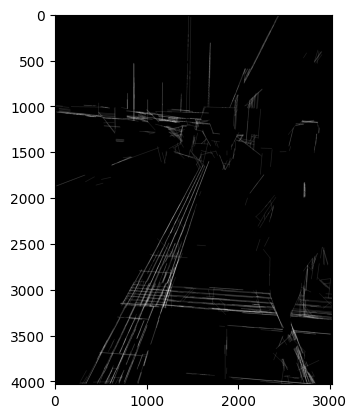

In [36]:
bw = np.zeros(np.shape(img))
for (x1,y1,x2,y2) in lines:
    cv2.line(bw, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(bw)


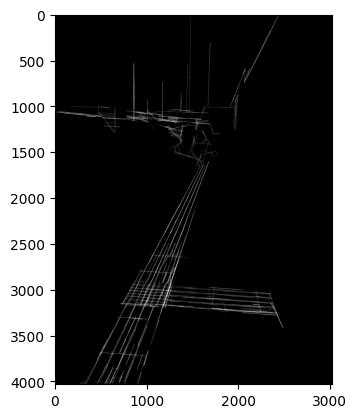

In [37]:
bw = bw.astype("uint8")

nr, labels = cv2.connectedComponents(bw)
plt.imshow(labels == 1)

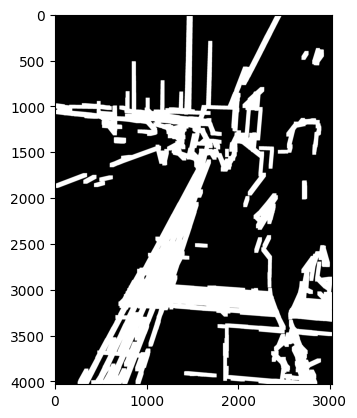

In [43]:
bw_new = cv2.dilate(bw ,np.ones((3,3)), iterations=20)
plt.imshow(bw_new)

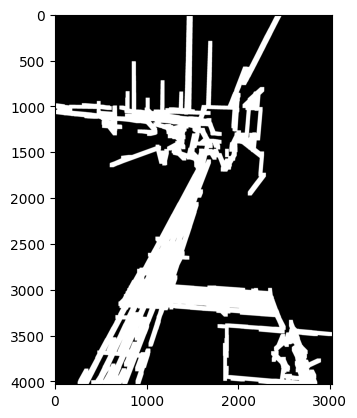

In [44]:
nr, labels = cv2.connectedComponents(bw_new)
bw_connect = (labels==1) * 1
plt.imshow(bw_connect)

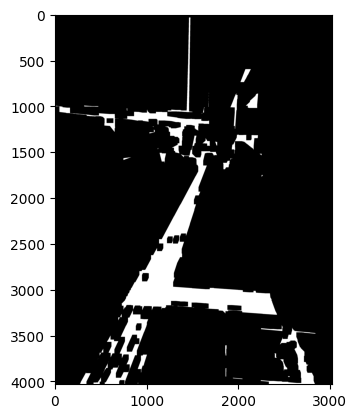

In [49]:
bw_connect_new = cv2.erode(bw_connect.astype('uint8'), np.ones((3,3)), iterations=25)
plt.imshow(bw_connect_new)

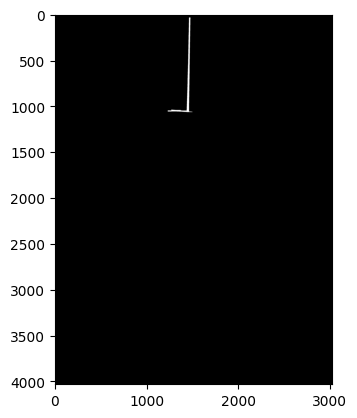

In [50]:
nr, labels = cv2.connectedComponents(bw_connect_new)
bw_final = (labels==2) * 1
plt.imshow(bw_final)